# ANALYSE DES FACTEURS DE RÉUSSITE D’UN ÉTUDIANT

# Objectif
* modéliser les facteurs qui prédisent le potentiel qu’un étudiant va réussir l’examen final de diplomation.  


# Type de modélisation
* Classification car la cible est discrète et les classes sont connues

# Algorithmes

* KNN
* Arbre de décision



# I DESCRIPTION DE DONNÉES

* Apprentissage du modele sur tout le dataset.
* Effectur le Test du modele sur le meme dataset, 
* Evaluer et comparer la classe predite avec la vraie classe

In [405]:
import numpy as np
import pylab as pl
import pandas as pd
import csv as csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# Charger les données du fichier csv
df=pd.read_csv("data_etudiants.csv")




* Affichage des 10 premiers 

In [406]:
# Afficher les données
df.head(10)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,no
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,yes


* Shape

In [407]:
df.shape

(395, 31)

In [408]:

#Afficher les colonnes et leurs types de données
df.dtypes

# On a 18 Variables de type object contre 13 variables de type entier"""

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

# II EXPLORATION DE DONNÉES


* Exploration des variables quantitatives et catégorielles
* univariée, bivariée, multidimensionnelle 


### Exploration des variables quantitatives

* Statistique descriptives

In [409]:
#Sommaire des variables numériques
df.describe()
#Verifier le count pour chacun des attributs

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


* Observations générales

In [410]:
# 13 Variables sont quantitatives sur 31
# il n'y a pas de données manquantes
# la variable absences a des valeurs extrêmes
# les 12 variables restantes ne présentent pas une grande dispersions dans les données

* Distribution de probabilité pour quelques variables de prédiction

In [411]:
#plot des dist de prob variables avec le module seaborn (voir matplotlib)
#import du module
import seaborn as sns 
%matplotlib inline

* Distribution pour une des variables: absences

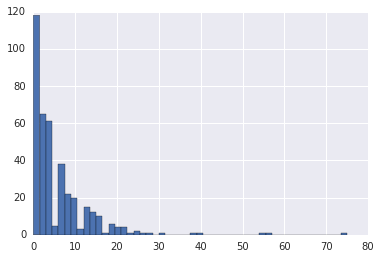

In [412]:
df['absences'].hist(bins=50)

* Ajout de trace KDE

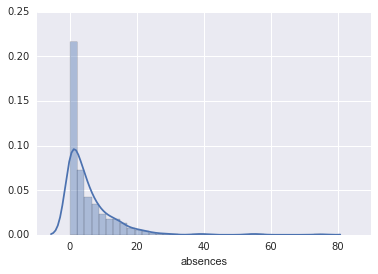

In [413]:
#KDE en meme temps
attr = df['absences']
sns.distplot(attr)
#Important: On oberve des outliers étalés vers la droite

* Utilisation du boxplot pour identifier les outliers ou valeurs extremes

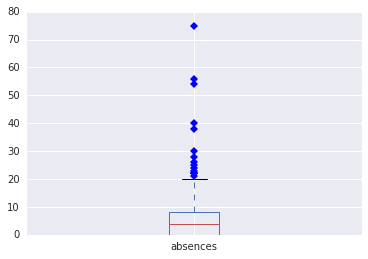

In [414]:
#Box plot pour identifier les valeurs extrêmes et la distribution des valeurs
df.boxplot(column='absences', sym='gD',return_type='axes')
#remarque: bcp d'outliers

* Ségregation par sexe

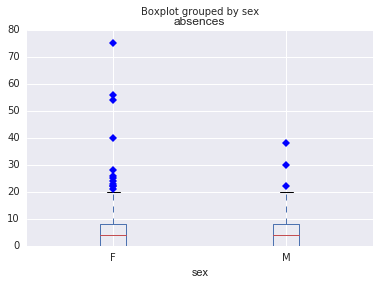

In [415]:
df.boxplot(column='absences',sym='gD', by = 'sex')
#remarque: bcp d'outliers du coté des Femelles

* Ségregation par age

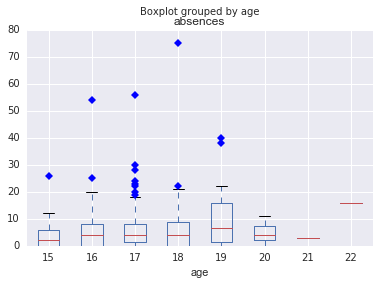

In [416]:
df.boxplot(column='absences',sym='gD', by = 'age')
#remarque: bcp plus d'outliers chez les étudiants de 17 ans

* Exploration d'une autre variable de prédiction

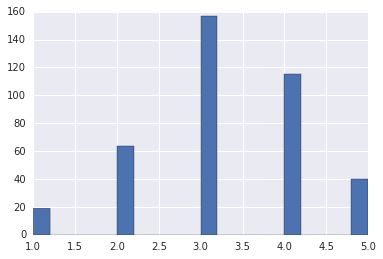

In [417]:

df['freetime'].hist(bins=20)


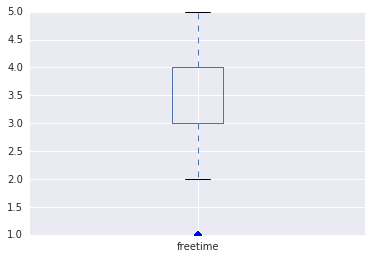

In [418]:
#box plot
df.boxplot(column='freetime',sym='gD', return_type='axes')
#remarque:un outlier

### Exploration des variables catégorielles

In [419]:
# Frequences 

for col in df.columns:
    if (df[col].dtypes ==  "object"):
        #selection des frequences
        nb= df[df[col].name].value_counts(ascending=True)
        print(nb)        
        print
# Toutes les données sont renseigner dans les 18 variables

MS     46
GP    349
Name: school, dtype: int64

M    187
F    208
Name: sex, dtype: int64

R     88
U    307
Name: address, dtype: int64

LE3    114
GT3    281
Name: famsize, dtype: int64

A     41
T    354
Name: Pstatus, dtype: int64

health       34
teacher      58
at_home      59
services    103
other       141
Name: Mjob, dtype: int64

health       18
at_home      20
teacher      29
services    111
other       217
Name: Fjob, dtype: int64

other          36
reputation    105
home          109
course        145
Name: reason, dtype: int64

other      32
father     90
mother    273
Name: guardian, dtype: int64

yes     51
no     344
Name: schoolsup, dtype: int64

no     153
yes    242
Name: famsup, dtype: int64

yes    181
no     214
Name: paid, dtype: int64

no     194
yes    201
Name: activities, dtype: int64

no      81
yes    314
Name: nursery, dtype: int64

no      20
yes    375
Name: higher, dtype: int64

no      66
yes    329
Name: internet, dtype: int64

yes    132
no     263


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(-1.0017067424594561,
 1.1321457255058389,
 -1.0033144775738505,
 1.0767153758519528)

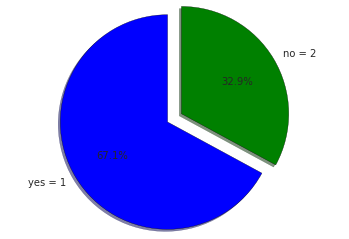

In [420]:
# Camembert de la variable target PASSED

%pylab inline
name = ['yes = 1', 'no = 2']
data = [265, 130]

explode=(0, 0.15)
pl.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True, )
pl.axis('equal')

# Environ un tiers des étudiants échoue à l'examen de diplomation

# III PRÉ-TRAITEMENT  DE DONNÉES 


* Lissage de la variable "absences"
* Numérisation des variables catégorielle


* Lissage de la variable quantitative absences

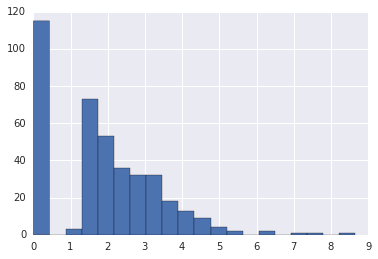

In [421]:
# Diminuer l'impact des valeurs extremes
import numpy as np
df['absences_sqrt'] = np.sqrt(df['absences'])
# suppression de la variable absences
df.drop(['absences'],inplace=True,axis=1,errors='ignore')
df['absences_sqrt'].hist(bins=20)

* Numérisation des variables catégorielles

In [422]:
#Transformation des variables catégorielles en entiers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
   
for col in df.columns:
    if (df[col].dtypes ==  "object"):
        #selection des frequences
        df[df[col].name] = le.fit_transform(df[df[col].name])
df.dtypes      
       


school             int64
sex                int64
age                int64
address            int64
famsize            int64
Pstatus            int64
Medu               int64
Fedu               int64
Mjob               int64
Fjob               int64
reason             int64
guardian           int64
traveltime         int64
studytime          int64
failures           int64
schoolsup          int64
famsup             int64
paid               int64
activities         int64
nursery            int64
higher             int64
internet           int64
romantic           int64
famrel             int64
freetime           int64
goout              int64
Dalc               int64
Walc               int64
health             int64
passed             int64
absences_sqrt    float64
dtype: object

# IV SELECTION DES FEATURES

* Supression des variables redondante
* Supression des variables très peu corrélées à la cible
* Éventuellement extraction de variables par le PCA

### Études des corrélations de Pearson

* C'est la plus appropriée pour nos données numériques
* But: on essaye d'obtenir un ensemble de features independent les uns des autres



### Interprétation
* valeur de 1: correlation totale
* valeur -1: correlation négative
* valeur 0: pas de correlation

In [423]:
#Matrice des corrélation
df.corr(method='pearson')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,passed,absences_sqrt
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.031254,-0.082994
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,0.070618,-0.028137
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,-0.179645,0.159962
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.216842,0.005257,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,0.052282,-0.039513
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,0.000720,0.034395,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.041842,0.058006
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,0.070074,-0.040451,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.044050,-0.112454
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.115396,0.098676
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.108057,0.003426
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.216969,-0.062999,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.026592,0.053647
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.035777,-0.000583,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.028309,-0.014322


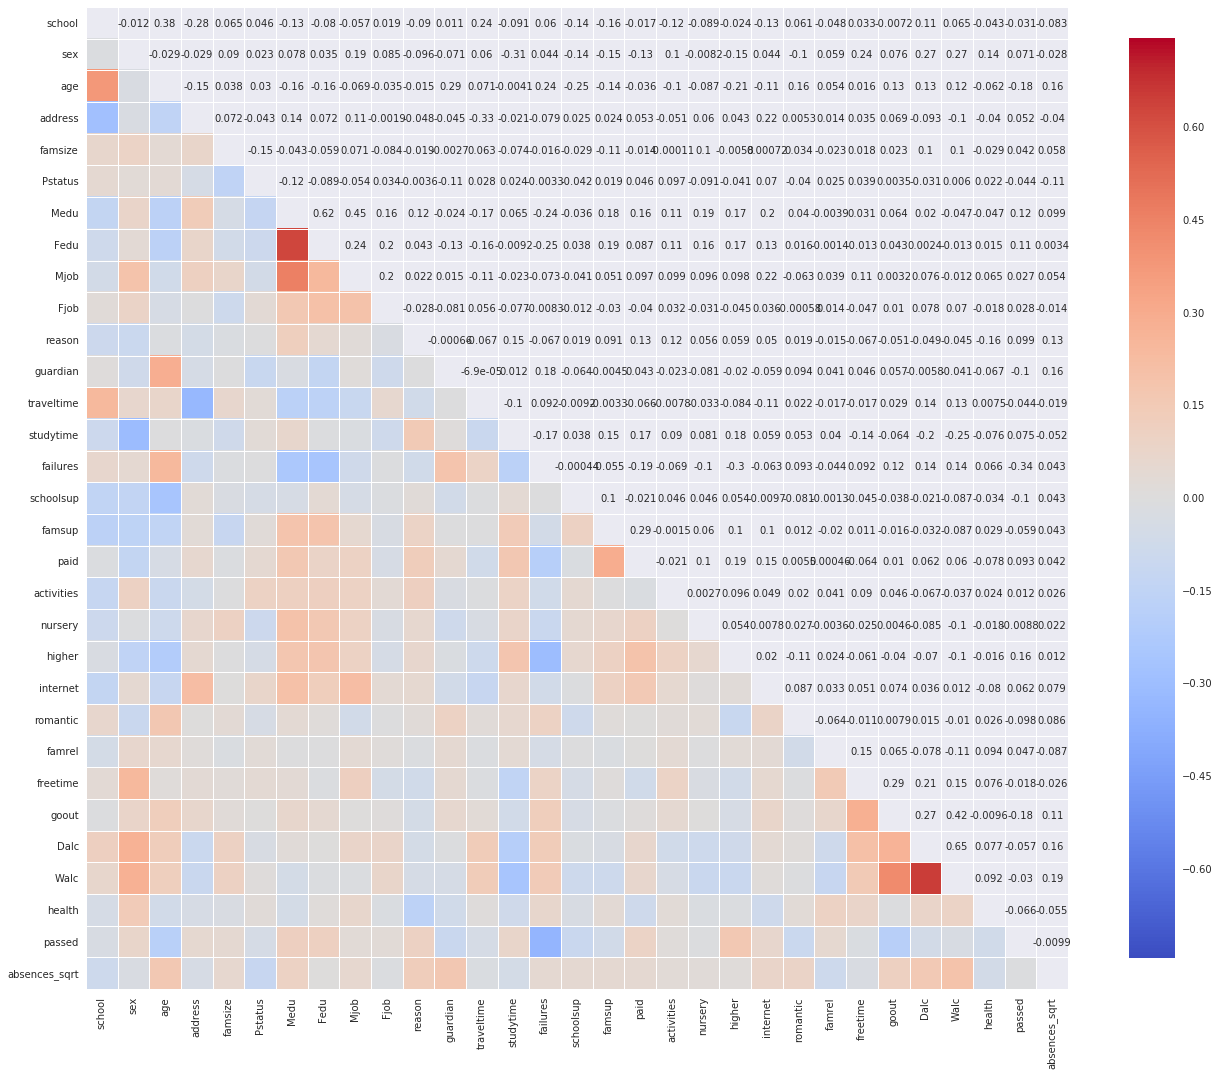

In [424]:
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
# graphique illustrant les corrélations
fig, ax = plt.subplots(figsize=(22, 22))
sns.corrplot(df, annot=True, sig_stars=False, diag_names=False)

### Supression des variables

* Selection des variables très peu corrélées à la cible

In [425]:
#Matrice des corrélation
correl = df.corr(method='pearson')

# Variables faiblement corrélées à la cible PASSEDN
print(" les variables les moins corrélées à la variable cible")
print
for col in df.columns:
     if abs(correl["passed"][df[col].name]) < 0.05:
        print (df[col].name, correl["passed"][col])
        print 

# 12 variables sont très peu corrélées à la cible

 les variables les moins corrélées à la variable cible

('school', -0.0312536753550492)

('famsize', 0.04184220871931188)

('Pstatus', -0.044050217591330966)

('Mjob', 0.026591622003174158)

('Fjob', 0.028309249822316727)

('traveltime', -0.044446484162442242)

('activities', 0.012414175760635851)

('nursery', -0.0087835767682583402)

('famrel', 0.046683357692551358)

('freetime', -0.018321373056005862)

('Walc', -0.029956852852272571)

('absences_sqrt', -0.0099384557102323908)



* supression

In [426]:
#Suppression des variables moins corrélées à la cible 
df.drop(['school', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'traveltime','activities', 'nursery','famrel','freetime', 'Walc', 
             'absences_sqrt'],inplace=True,axis=1,errors='ignore')

### Explication


In [427]:
# Les variables non corrélées à la ne sont pas utile pour notre modèle





* Selection des variables redondantes

In [428]:
# Destection des variables redondante entre les variables indépendantes
print(" les variables indépendantes fortement corrélées entre elles") 
print
for col in df.columns:
    for row in df.columns:
        if (df[col].name != df[row].name and abs(correl[df[row].name][df[col].name]) > 0.6) :
            print (df[col].name, df[row].name, correl[df[row].name][df[col].name])


 les variables indépendantes fortement corrélées entre elles

('Medu', 'Fedu', 0.62345511208064475)
('Fedu', 'Medu', 0.62345511208064475)


* Supression

In [429]:
#Suppression des variables redondantes entre les moins corrélées à la cible 
df.drop(['Fedu'],inplace=True,axis=1,errors='ignore')

### Explication

In [430]:
# Les variables independantes fortement correlees entre elles apportent du superflue dans les analyses
# Nous ne retenons que celles des deux qui est le plus fortement correlée a la variable Cible 


In [431]:
#Nouvelles tailles du dataframe
print df.shape

(395, 18)


### Exploration multi-dimensionnelle: PCA

* Permet d'Extraire des variables dans un grand ensemble de variable 

In [432]:
# import 
from sklearn.decomposition import PCA
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

# Définition des variables indépendantes et de la cible

Y = df["passed"]

X = df
X.drop(['passed'], inplace=True,axis=1,errors='ignore')


* définition du modèle

In [433]:
# définition du modèle
pca = PCA(n_components=17)

# Estimation, calcul des composantes principales
pca.fit(X)



PCA(copy=True, n_components=17, whiten=False)

* Graphique  de la variance cumulative

[  19.01   36.52   49.05   61.12   70.09   77.22   82.41   86.45   89.09
   91.24   93.2    94.91   96.44   97.83   98.8    99.66  100.01]


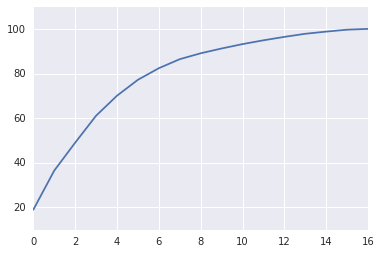

In [434]:
# variance expliquée par chaque PC explique
var= pca.explained_variance_ratio_

# Variance cumulative
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print var1

plt.plot(var1)



* Explication

In [435]:
# le graphique montre que 17 composantes expliquent environ (100.01%) de la variance de données. 
# Ainsi, nous conservons toutes nos variables pour la modélisation.
# Null besoin d'extraire des variables


# V MODÉLISATION

* l'Arbre de décision
* KNN

###  Programme d'exécution du modèle

In [436]:
#Importation des modèles du module scikit learn:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score

# fonction Générique pour les modèles de classification et l'évaluation des performances:
def classification_model(model,predictors, outcome):
 
 print " Resultats selon les échantillons d'apprentissage "
 i = 100
 while i <= 300:
      # Effectuer l'apprentissage du model sur tout le dataset
    X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, train_size = i, test_size=0.24, random_state = 33)
    # predire la réponse pour les observations dans X, test du model
    print ("_______________________________________________________")
    print X_train.shape, X_test.shape, y_train.shape, y_test.shape
    print
    #implémentation du modèle:
    model.fit(X_train,y_train)
    
    #Prédiction:
    predtrain = model.predict(X_train)
    predtest = model.predict(X_test)
     
    #calcul des performances F1_score
    scoretrain = f1_score(y_train, predtrain, average='micro')
    scoretest = f1_score(y_test, predtest, average='micro')
    print "F1_score Train : %s" % "{0:.3%}".format(scoretrain)
    print "F1_score Test : %s" % "{0:.3%}".format(scoretest)
    i = i+100
    print



## Méthode du KNN

* Selection du meilleur K adapté pour les données

In [437]:
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split

# Effectuer l'apprentissage du model sur tout le dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
test_size=0.25, random_state = 33)
# K=1 a K=30 et calcul testing accuracy pour knn
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

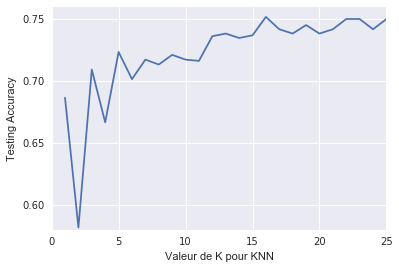

In [438]:
# Tracer le graphe

% matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Valeur de K pour KNN')
plt.ylabel('Testing Accuracy')

In [460]:
# K=16 est la valeur pour laquelle l'algorithme offre une meilleur performance

from sklearn import neighbors
import time

#KNN avec K=16
model_knn = neighbors.KNeighborsClassifier(16,weights='uniform')
outcome_var = Y
predictor_var = X
tmps1=time.time()
classification_model(model_knn, predictor_var,outcome_var)
tmps2=time.time()-tmps1

# Temps d'exécution du modèle
print "Temps d'execution = %f" %tmps2
    

 Resultats selon les échantillons d'apprentissage 
_______________________________________________________
(100, 17) (95, 17) (100L,) (95L,)

F1_score Train : 86.705%
F1_score Test : 74.483%

_______________________________________________________
(200, 17) (95, 17) (200L,) (95L,)

F1_score Train : 85.093%
F1_score Test : 72.727%

_______________________________________________________
(300, 17) (95, 17) (300L,) (95L,)

F1_score Train : 84.711%
F1_score Test : 73.239%

Temps d'execution = 0.033000


C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
C:\Anaconda2\lib\site-

* Constat

In [440]:
# Plus la taille d'apprentissage est grande, la prédiction de l'échantillon train diminue
# Plus la taille d'apprentissage est grande, la prédiction du test fluctue dans la décroissante et la croissance

## Arbre de décision

* Selection de la meilleur profondeur de l'arbre adaptée pour nos donnée

('max_depth', 1, 'erreur', 0.42722358194697291, 0.49566615639703909)
('max_depth', 2, 'erreur', 0.41589284468595505, 0.49365523524620808)
('max_depth', 3, 'erreur', 0.40502605238256351, 0.48754452035889534)
('max_depth', 4, 'erreur', 0.39150479770500168, 0.49323065910215957)
('max_depth', 5, 'erreur', 0.38473698098037523, 0.5067828783544378)
('max_depth', 6, 'erreur', 0.37714015129754908, 0.53251699134800268)
('max_depth', 7, 'erreur', 0.37385166017029259, 0.53461769176131679)
('max_depth', 8, 'erreur', 0.37385166017029259, 0.53461769176131679)
('max_depth', 9, 'erreur', 0.37385166017029259, 0.53461769176131679)


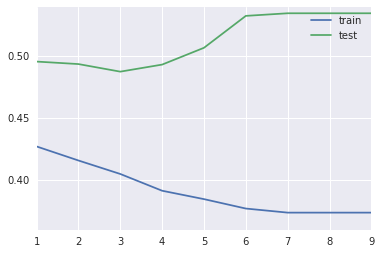

In [441]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

# Effectuer l'apprentissage du model sur tout le dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
test_size=0.25, random_state = 33)
curves = []
for max_depth in range(1,10) :
    clf = DecisionTreeRegressor(min_samples_leaf=10, max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    erra = mean_squared_error( clf.predict(X_train), y_train)**0.5
    errb = mean_squared_error( clf.predict(X_test), y_test)**0.5
    print("max_depth",max_depth, "erreur",erra,errb)
    curves.append((max_depth, erra,errb, clf) )
plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")
plt.legend()

* Explication 

In [442]:
# Dès  'max_depth'=7, l'écart de l'erreur ne change presque plus d'où
# On va donc construire l'arbre avec cette valeur de  'max_depth'=7

In [458]:
# Créer l'objet Classifier
from sklearn.tree import DecisionTreeClassifier 
import time 
model_tree = DecisionTreeClassifier(max_depth=7) 
outcome_var = Y
predictor_var = X

tmps1=time.time()
classification_model(model_tree, predictor_var,outcome_var)
tmps2=time.time()-tmps1
print "Temps d'execution = %f" %tmps2

 Resultats selon les échantillons d'apprentissage 
_______________________________________________________
(100, 17) (95, 17) (100L,) (95L,)

F1_score Train : 99.338%
F1_score Test : 66.667%

_______________________________________________________
(200, 17) (95, 17) (200L,) (95L,)

F1_score Train : 97.527%
F1_score Test : 62.069%

_______________________________________________________
(300, 17) (95, 17) (300L,) (95L,)

F1_score Train : 92.617%
F1_score Test : 75.591%

Temps d'execution = 0.014000


C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
C:\Anaconda2\lib\site-

* Constat

In [444]:
# Plus la taille d'apprentissage est grande, la prédiction de l'échantillon train diminue
# Plus la taille d'apprentissage est grande, la prédiction du test fluctue dans la décroissante et la croissance

# VI CHOIX DU MEILLEUR MODÈLE


### Critères de choix

* Meilleur combinaison prédiction train et prédiction test
* Meilleur temps d'exécution

In [447]:

# L'Arbre de décision est le meilleur modèle qui combinent la meilleure prédiction et le meilleur temps d'exécution


### Sauvegarde du modèle Arbre de décision

In [446]:
# sauvegarder le modele
import pickle
model_tree = DecisionTreeClassifier(max_depth=7) 
outcome_var = Y
predictor_var = X
  

filename = 'tree_model.sav'
pickle.dump(model_tree, open(filename, 'wb'))
print "sauvegarde du modele terminée !"

sauvegarde du modele terminée !
